In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

In [64]:
data = pd.read_csv('/content/train.csv')

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
data['Age'].median()

28.0

In [69]:
data['Age']  = data['Age'].fillna(data['Age'].median())

In [70]:
data['Embarked'].mode()

0    S
dtype: object

In [71]:
data['Embarked'] = data['Embarked'].fillna('S')

In [72]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [73]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [74]:
data['Cabin'] = data['Cabin'].fillna('B96')

In [75]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [76]:
plt.style.use("fivethirtyeight")
sns.set_style("white")

In [77]:
colors1 = ['#e6ccb2','#b08968','#7f5539'] 
colors2 = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e']

In [78]:
def cat_unmarited_analysis(feature):
  plot  = sns.countplot(data[feature])
  plot.set_xticklabels(plot.get_xticklabels(),rotation = 40)
  data_ =data[feature].value_counts().sort_values(ascending = True)
  plt.figure(figsize = (20,5),facecolor = 'white')
  plt.subplot(1,2,1)
  plt.barh(y = data_.index,width = data_.values,
           linewidth = 1,height = 0.7,
           color = colors2,edgecolor = 'k')
  

  sns.despine()
  ax = plt.subplot(1,2,2)
  ax.pie(x = data_.values,labels = data_.index,
         radius =1.2,shadow = True,
         colors = colors2,autopct = "%1.1f%%",
         explode = [0.04 for i in range(data[feature].nunique())])
  ax.add_artist(plt.Circle((0,0),0.04 ,facecolor = 'white'))
  plt.suptitle(t = feature,fontweight = 'bold')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


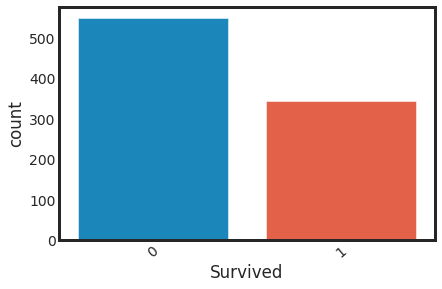

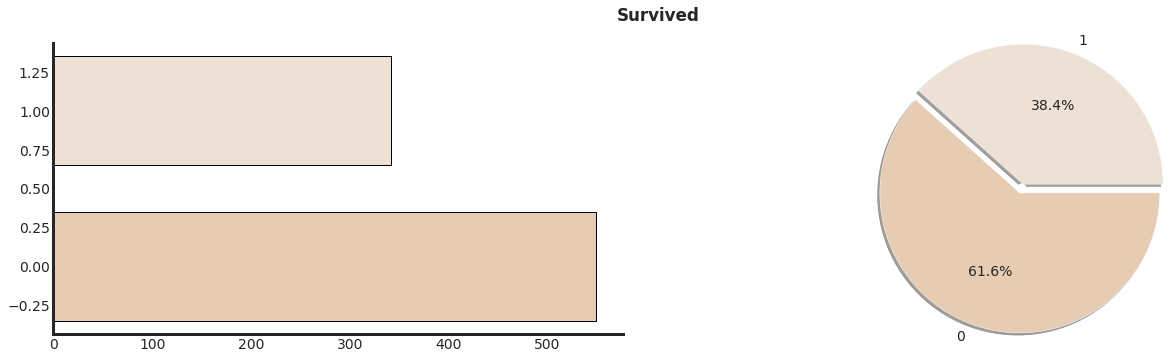

In [79]:
cat_unmarited_analysis('Survived')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


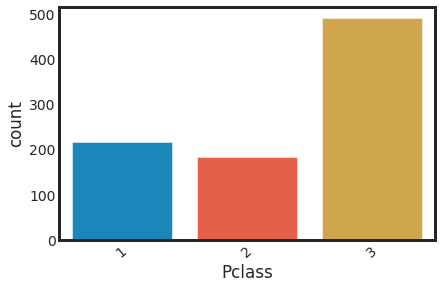

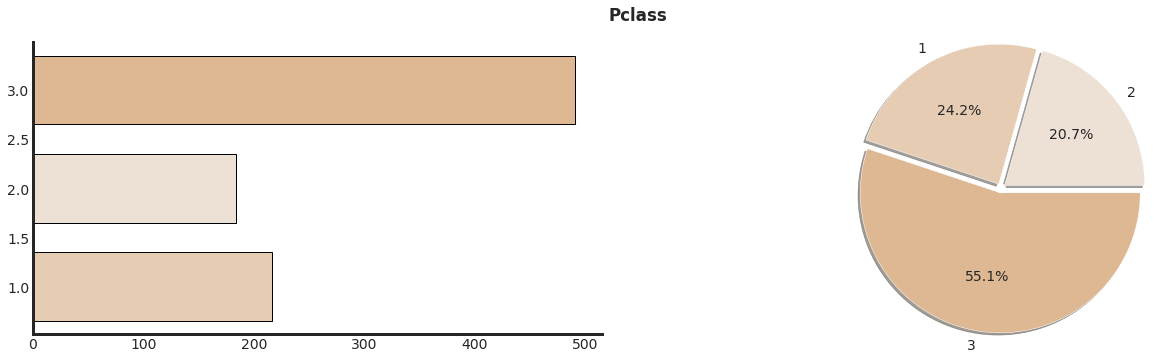

In [80]:
cat_unmarited_analysis("Pclass")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


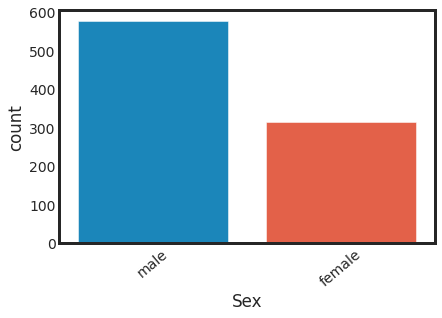

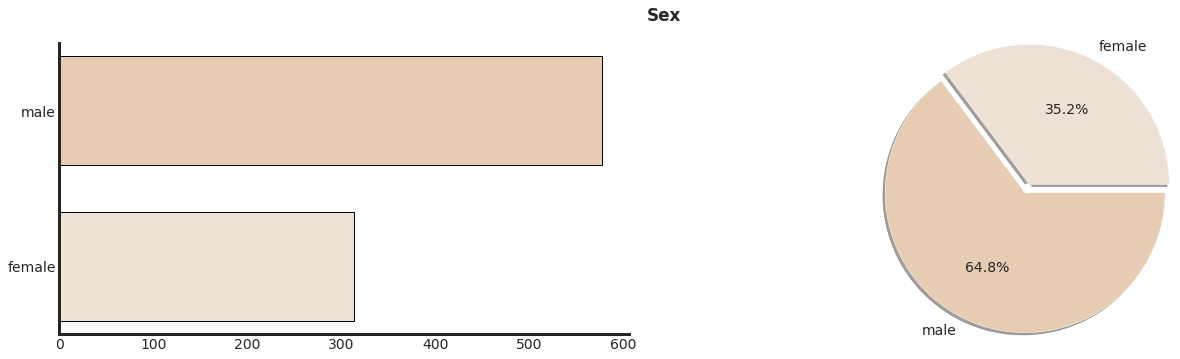

In [81]:
cat_unmarited_analysis("Sex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


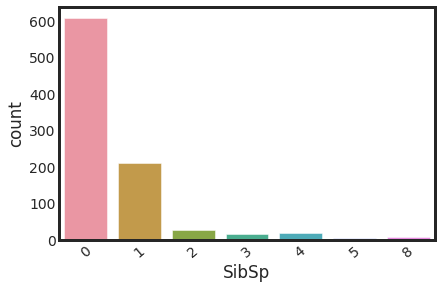

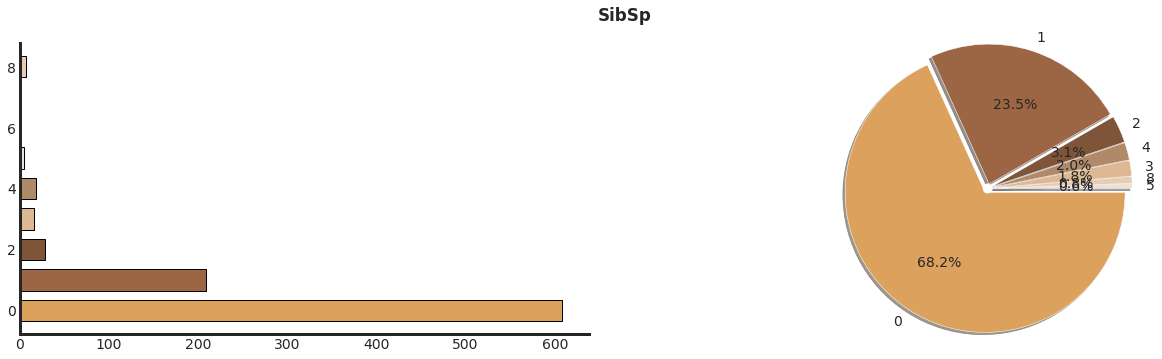

In [82]:
cat_unmarited_analysis("SibSp")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


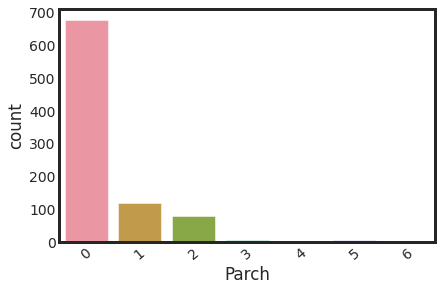

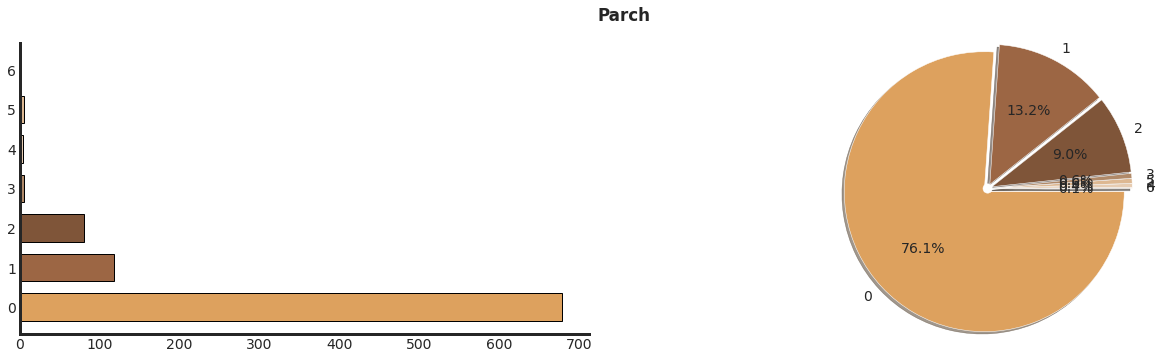

In [83]:
cat_unmarited_analysis("Parch")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


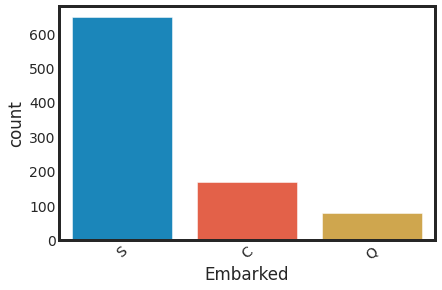

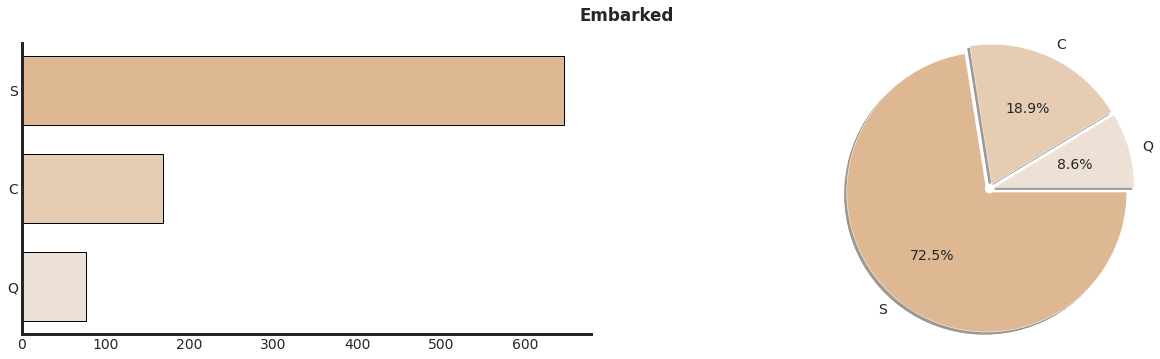

In [84]:
cat_unmarited_analysis("Embarked")

In [85]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [86]:
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [87]:
data.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':1,"C":2,"Q":3}},inplace = True)

In [88]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Mangan, Miss. Mary",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,NaN,NaN,NaN,0.647587,0.47799,0,0,1,1,1
Age,891,NaN,NaN,NaN,29.3616,13.0197,0.42,22,28,35,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,1601,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
encoder = LabelEncoder()

In [96]:
data['Ticket'] = encoder.fit_transform(data['Ticket'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data['Cabin'] = encoder.fit_transform(data['Cabin'])

In [97]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,47,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,82,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,47,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,56,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,47,0


In [98]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

In [99]:
X = data.drop(columns = ['Name','Survived'],axis = 1)
Y = data['Survived']

In [100]:
print(X)

     PassengerId  Pclass  Sex   Age  ...  Ticket     Fare  Cabin  Embarked
0              1       3    1  22.0  ...     523   7.2500     47         0
1              2       1    0  38.0  ...     596  71.2833     82         1
2              3       3    0  26.0  ...     669   7.9250     47         0
3              4       1    0  35.0  ...      49  53.1000     56         0
4              5       3    1  35.0  ...     472   8.0500     47         0
..           ...     ...  ...   ...  ...     ...      ...    ...       ...
886          887       2    1  27.0  ...     101  13.0000     47         0
887          888       1    0  19.0  ...      14  30.0000     30         0
888          889       3    0  28.0  ...     675  23.4500     47         0
889          890       1    1  26.0  ...       8  30.0000     61         1
890          891       3    1  32.0  ...     466   7.7500     47         2

[891 rows x 10 columns]


In [127]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.1,random_state=1)

In [110]:
print(X.shape,X_train.shape,X_test.shape)

(891, 10) (801, 10) (90, 10)


In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model = LogisticRegression()

In [113]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [114]:
train_predict = model.predict(X_train)

In [115]:
test_predict = model.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
score1 = accuracy_score(Y_train,train_predict)

In [118]:
score2 = accuracy_score(Y_test,test_predict)

In [119]:
print(score1)

0.7902621722846442


In [120]:
print(score2)

0.7


In [126]:
input_data = [2,1,0,38.0,1,0,596,71.2833,82,1]
in_array_data = np.array(input_data)
reshape_data = in_array_data.reshape(1,-1)
prediction = model.predict(reshape_data)

if prediction[0]==1:
  print('survived')
else:
  print("NotSurvived")

survived


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
